<a href="https://colab.research.google.com/github/HoangLong1907/Nhandang-CS338/blob/main/Baitap/KNN_without_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Input data - [điểm GK, điểm CK] của sinh viên UIT
X = [[9.5, 7.0], [6.75, 5.0], [5.5, 6.5], [7.5, 6.25], [10.0, 8.5], [8.25, 5.5], [9.0, 9.0], 
     [6.0, 8.0], [8.0, 6.0], [7.0, 8.0], [8.25, 9.0], [6.5, 9.0], [7.75, 7.5], [8.0, 8.0], 
     [7.0, 5.0], [9.5, 8.0], [8.0, 9.0], [9.0, 9.5], [7.75, 8.25], [9.0, 4.5], [9.0, 5.5], 
     [5.5, 4.0], [4.0, 5.0], [4.5, 5.0], [7.0, 2.5], [5.0, 4.25], [4.0, 5.75], [4.75, 4.0], 
     [4.75, 3.0], [6.5, 3.0], [5.5, 3.0], [2.75, 6.5], [5.5, 3.0], [2.0, 6.5], [2.25, 5.0], 
     [4.5, 5.0], [3.75, 5.5], [2.0, 5.25], [4.0, 4.0], [2.25, 6.5], [5.0, 3.0], [3.75, 3.25]]

# Labels - Dat hoặc KhongDat
Y = ['Dat','Dat','Dat','Dat','Dat','Dat','Dat',
     'Dat','Dat','Dat','Dat','Dat','Dat','Dat',
     'Dat','Dat','Dat','Dat','Dat','Dat','Dat',
     'KhongDat','KhongDat','KhongDat','KhongDat','KhongDat','KhongDat','KhongDat',
     'KhongDat','KhongDat','KhongDat','KhongDat','KhongDat','KhongDat','KhongDat',
     'KhongDat','KhongDat','KhongDat','KhongDat','KhongDat','KhongDat','KhongDat',]

[]

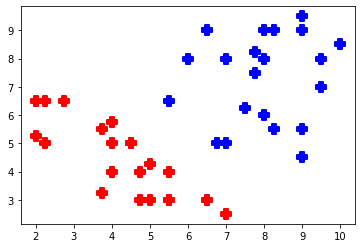

In [ ]:
for i in range(len(X)):
    if Y[i] == 'Dat':
        plt.scatter(X[i][0], X[i][1], s=120, marker='P', linewidths=2, color='blue')
    else:
        plt.scatter(X[i][0], X[i][1], s=120, marker='P', linewidths=2, color='red')
        
plt.plot()

In [ ]:
# Tìm biến nào nhiều nhất trong một mảng các biến
def most_found(array):
    list_of_words = []
    for i in range(len(array)):
        if array[i] not in list_of_words:
            list_of_words.append(array[i])
            
    most_counted = ''
    n_of_most_counted = None
    
    for i in range(len(list_of_words)):
        counted = array.count(list_of_words[i])
        if n_of_most_counted == None:
            most_counted = list_of_words[i]
            n_of_most_counted = counted
        elif n_of_most_counted < counted:
            most_counted = list_of_words[i]
            n_of_most_counted = counted
        elif n_of_most_counted == counted:
            most_counted = None
            
    return most_counted

**KNN Algorithm**

**Euclidean Distance**:square root of sum of square of distance between two points in every dimension.Like pythagorean theorem: a^2 + b^2 = c^2

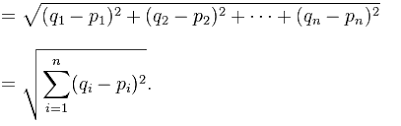

In [ ]:
def find_neighbors(point, data, labels, k=3):
    n_of_dimensions = len(point)
    
    # tìm  neighbors gần nhất
    neighbors = []
    neighbor_labels = []
    
    for i in range(0, k):
        nearest_neighbor_id = None
        smallest_distance = None
        
        for i in range(0, len(data)):
            eucledian_dist = 0
            for d in range(0, n_of_dimensions):
                dist = abs(point[d] - data[i][d])
                eucledian_dist += dist
                
            eucledian_dist = np.sqrt(eucledian_dist)
            
            if smallest_distance == None:
                smallest_distance = eucledian_dist
                nearest_neighbor_id = i
            elif smallest_distance > eucledian_dist:
                smallest_distance = eucledian_dist
                nearest_neighbor_id = i
                
        neighbors.append(data[nearest_neighbor_id])
        neighbor_labels.append(labels[nearest_neighbor_id])
        
        data.remove(data[nearest_neighbor_id])
        labels.remove(labels[nearest_neighbor_id])
    return neighbor_labels

def k_nearest_neighbor(point, data, labels, k=3):
    
    # Nếu tìm thấy nhiều nhất hai nhãn khác nhau, tiếp tục tìm kiếm thêm 1 nhãn k
    while True:
        neighbor_labels = find_neighbors(point, data, labels, k=k)
        label = most_found(neighbor_labels)
        if label != None:
            break
        k += 1
        if k >= len(data):
          break
            
    return label

Predict label using KNN

In [ ]:
point1 = [4.0, 5.0]
k_nearest_neighbor(point1, X, Y, k=5)


'KhongDat'

In [ ]:
point2 = [8.0, 5.0]
k_nearest_neighbor(point2, X, Y, k=3)

'Dat'